In [55]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from pandas.plotting import scatter_matrix

In [2]:
autompg_headers = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [5]:
autompg_data = read_csv('C:/dataset/auto_mpg_data.csv', names=autompg_headers)

In [6]:
print (autompg_data.head(5))

    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [7]:
check_missing_data = autompg_data[autompg_data.isna().any(axis=1)]

In [8]:
print('Missing data \n', check_missing_data)

Missing data 
 Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name]
Index: []


In [9]:
print(autompg_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB
None


In [10]:
autompg_data['horsepower'] = pd.to_numeric(autompg_data['horsepower'], errors='coerce')

In [12]:
missing_data = autompg_data[autompg_data.isna().any(axis=1)]
print('Missing data after converting to float', missing_data)

Missing data after converting to float       mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN    2046          19.0   
126  21.0          6         200.0         NaN    2875          17.0   
330  40.9          4          85.0         NaN    1835          17.3   
336  23.6          4         140.0         NaN    2905          14.3   
354  34.5          4         100.0         NaN    2320          15.8   
374  23.0          4         151.0         NaN    3035          20.5   

     model_year  origin              car_name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  
374          82       1        amc concord dl  


In [13]:
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(autompg_data)
new_data = imputer.transform(autompg_data)

In [14]:
autompg_data = pd.DataFrame(data=new_data, columns=autompg_headers)

In [21]:
train_headers = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

In [22]:
target_header = ['mpg']

In [23]:
x = autompg_data[train_headers]
y = autompg_data[target_header]

In [39]:
x = autompg_data.iloc[:, 2].values.reshape((-1,1))

In [40]:
print('X Dimension', x.shape)
print('Y Dimension', y.shape)

X Dimension (398, 1)
Y Dimension (398,)


In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [42]:
print('Total of Training Dataset', x_train.shape)
print('Total of Test Dataset', x_test.shape)

Total of Training Dataset (278, 1)
Total of Test Dataset (120, 1)


In [47]:
lr_regress= LinearRegression()

In [48]:
lr_regress.fit(x_train, y_train)

LinearRegression()

In [49]:
y_pred = lr_regress.predict(x_test)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [57]:
print('Slope: ', lr_regress.coef_)
print('Intercept: ', lr_regress.intercept_)
print('Mean Absolute Error: {:.2f}'.format(mae))
print('Mean Squared Error: {:.2f}'.format(mse))
print('Root Mean Squared Error: {:.2f}'.format(rmse))
print('R2 Score: ', r2)

Slope:  [-0.06103076]
Intercept:  35.25013010654775
Mean Absolute Error: 3.32
Mean Squared Error: 17.84
Root Mean Squared Error: 4.22
R2 Score:  0.6949301767586249


Text(0, 0.5, 'y - MPG')

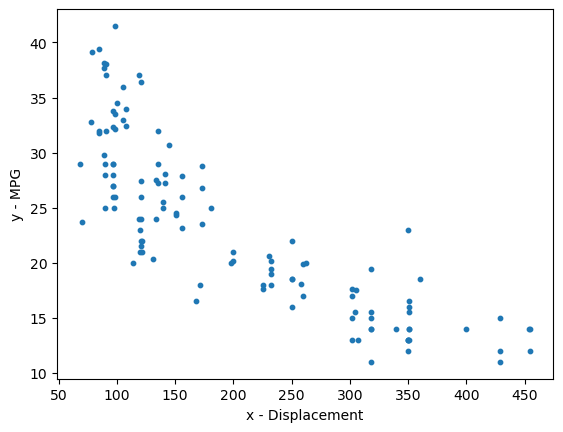

In [60]:
plt.scatter(x_test, y_test, s=10)
plt.xlabel('x - Displacement')
plt.ylabel('y - MPG')

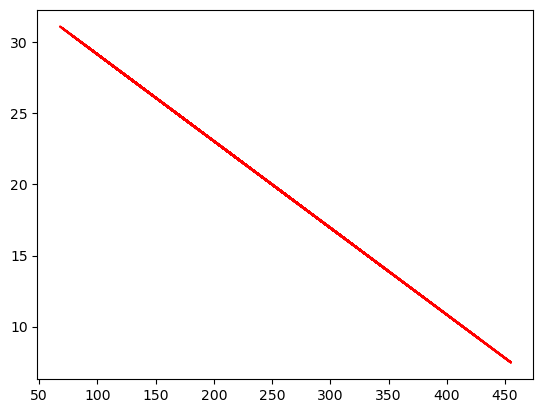

In [61]:
plt.plot(x_test, y_pred, color='r')
plt.show()

In [62]:
pred_my_value = lr_regress.predict([[171.0]])
print("Prediction: ", pred_my_value, '\n')

Prediction:  [24.8138704] 

